In [2]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os 
os.chdir("..")
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *


In [3]:
params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params

train_id = 0
periods = 10
ppp = 1000
itraj = 1
rppp_reference = 1
method="rossler"
dt = (2*np.pi/(omega*ppp))
uts= {}

trajs = list(range(1,2))
for itraj in tqdm(trajs):
    try:
        states, covs, signals, params, times, u_th, covs_th = load_data(ppp=ppp, periods=periods, 
                                                         method=method, itraj=itraj, exp_path=exp_path , rppp = rppp_reference)
        uts[itraj] = u_th[:,0]
    except Exception:
        pass

100%|██████████| 1/1 [00:00<00:00, 360.92it/s]


In [15]:
tims, fisher, fisher_std = np.load("data/fisher_in_time.npy")


In [16]:
indices = [int(k) for k in np.logspace(3,np.log10(len(times)), 10)]
times_ml = [times[:k][-1] for k in indices]

In [17]:
oms = np.load("data/oms.npy")

In [18]:
lor_fit = np.load("data/fits_lorentzian_1traj_times(999, 5).npy")

In [19]:
lor_var_est, lor_var_true = np.zeros((2,lor_fit.shape[1]))
for i in range(lor_fit.shape[1]):
    lor_var_true[i] = np.mean(np.square(lor_fit[:,i]-omega))
    lor_var_est[i] = np.sum(np.square(lor_fit[:,i]-np.mean(lor_fit[:,i])))/len(lor_fit[:,i])

In [20]:
ml_var_est, ml_var_true = np.zeros((2,oms.shape[1]))
for i in range(oms.shape[1]):
    ml_var_true[i] = np.mean(np.square(oms[:,i]-omega))
    ml_var_est[i] = np.sum(np.square(oms[:,i]-np.mean(oms[:,i])))/len(oms[:,i])

Text(0, 0.5, 'Inverse of variance')

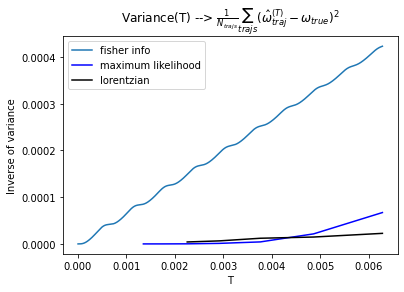

In [21]:
plt.title("Variance(T) --> "+r'$ \frac{1}{N_{trajs}} \sum_{trajs} (\hat{\omega}_{traj}^{(T)} - \omega_{true})^2$')
plt.plot(tims, fisher, label="fisher info")
plt.plot(times_ml[3:],1/ml_var_true, color="blue", label="maximum likelihood")
plt.plot(times_ml[5:],1/lor_var_true, color="black", label="lorentzian")
plt.legend()
plt.xlabel("T")
plt.ylabel("Inverse of variance")

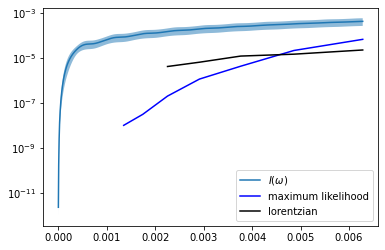

In [22]:
ax = plt.subplot(111)
ax.plot(tims, fisher, label=r'$I(\omega)$')
ax.fill_between(tims, fisher - fisher_std/2 , fisher + fisher_std/2, alpha=0.5)
ax.plot(times_ml[3:],1/ml_var_true, color="blue", label="maximum likelihood")
ax.plot(times_ml[5:],1/lor_var_true, color="black", label="lorentzian")
ax.set_yscale("log")
ax.legend()

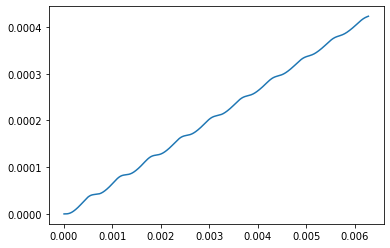

In [23]:
ax = plt.subplot(111)
ax.plot(tims, fisher, label=r'$I(\omega)$')

In [ ]:
ax = plt.subplot(111)
ax.plot(times[2:], fisher[2:], label=r'$I(\omega)$')
ax.fill_between(times[2:], fisher[2:] - fisher_std[2:]/2 , fisher[2:] + fisher_std[2:]/2, alpha=0.5)
ax.scatter(u_th_trajs_time.shape[1],[5.99e-5], color="black", label=r'$\frac{1}{Var[\tilde{\omega}]}$')
ax.scatter(u_th_trajs_time.shape[1],[1/(208.82)**2], color="red", label="lorentzian "r'$\frac{1}{Var[\tilde{\omega}]}$')

#
ax.set_yscale("log")
ax.legend()

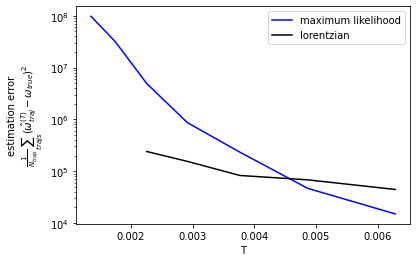

In [104]:
ax = plt.subplot(111)
ax.plot(times_ml[3:], ml_var_true, color="blue", label="maximum likelihood")
ax.plot(times_ml[5:], lor_var_true, color="black", label="lorentzian")
ax.set_yscale("log")
ax.set_ylabel("estimation error\n"+r'$ \frac{1}{N_{trajs}} \sum_{trajs} (\hat{\omega}_{traj}^{(T)} - \omega_{true})^2$')
ax.set_xlabel("T")
ax.legend()

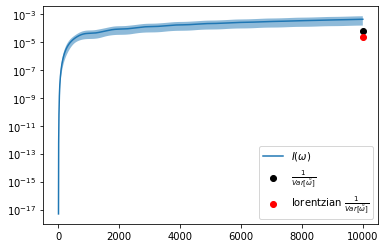

In [4]:
ax = plt.subplot(111)
ax.plot(times[2:], fisher[2:], label=r'$I(\omega)$')
ax.fill_between(times[2:], fisher[2:] - fisher_std[2:]/2 , fisher[2:] + fisher_std[2:]/2, alpha=0.5)
ax.scatter(u_th_trajs_time.shape[1],[5.99e-5], color="black", label=r'$\frac{1}{Var[\tilde{\omega}]}$')
ax.scatter(u_th_trajs_time.shape[1],[1/(208.82)**2], color="red", label="lorentzian "r'$\frac{1}{Var[\tilde{\omega}]}$')

#
ax.set_yscale("log")
ax.legend()

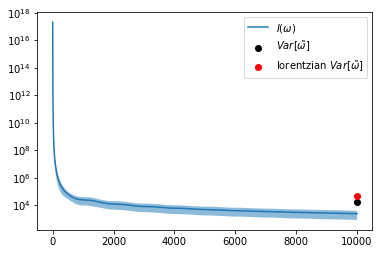

In [5]:
ax = plt.subplot(111)
ax.plot(range(u_th_trajs_time.shape[1])[2:], 1/fisher[2:], label=r'$I(\omega)$')
ax.fill_between(range(u_th_trajs_time.shape[1])[2:], 1/fisher[2:] - (fisher_std[2:]/fisher[2:]**2)/2 , 1/fisher[2:] + (fisher_std[2:]/fisher[2:]**2)/2, alpha=0.5)
ax.scatter(u_th_trajs_time.shape[1],[1/(5.99e-5)], color="black", label=r'$Var[\tilde{\omega}]$')
ax.scatter(u_th_trajs_time.shape[1],[(210.373)**2], color="red", label="lorentzian "r'$Var[\tilde{\omega}]$')

ax.set_yscale("log")
ax.legend()

Load train results

In [35]:
m , stds = {}, {}
trajs = np.linspace(10,9999,1000)
for lim in tqdm([int(k) for k in trajs]):

    u_th_trajs_time = np.stack(list(uts.values())[:lim])

    u_th_mean = np.mean(np.abs(u_th_trajs_time)**2, axis=0)
    u_th_std = np.std(np.abs(u_th_trajs_time)**2, axis=0)

    fisher = np.zeros(u_th_trajs_time.shape[1])
    fisher_std = np.zeros(u_th_trajs_time.shape[1])

    for tim in range(u_th_trajs_time.shape[1]):
        fisher[tim] = np.sum(u_th_mean[:tim])*dt
        fisher_std[tim] = np.sum(u_th_std[:tim])*dt
                               
    m[lim] = fisher
    stds[lim] = fisher_std

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:09<00:00,  3.23it/s]


In [9]:
ms = np.stack(m.values())

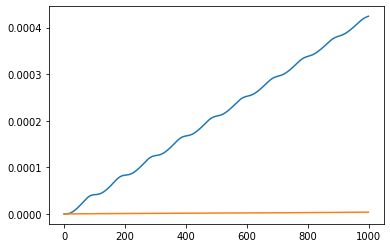

In [33]:
plt.plot([np.mean(ms[:,int(k)]) for k in trajs])

In [34]:
np.stack(stds)

array([  10,   19,   29,   39,   49,   59,   69,   79,   89,   99,  109,
        119,  129,  139,  149,  159,  169,  179,  189,  199,  209,  219,
        229,  239,  249,  259,  269,  279,  289,  299,  309,  319,  329,
        339,  349,  359,  369,  379,  389,  399,  409,  419,  429,  439,
        449,  459,  469,  479,  489,  499,  509,  519,  529,  539,  549,
        559,  569,  579,  589,  599,  609,  619,  629,  639,  649,  659,
        669,  679,  689,  699,  709,  719,  729,  739,  749,  759,  769,
        779,  789,  799,  809,  819,  829,  839,  849,  859,  869,  879,
        889,  899,  909,  919,  929,  939,  949,  959,  969,  979,  989,
        999, 1009, 1019, 1029, 1039, 1049, 1059, 1069, 1079, 1089, 1099,
       1109, 1119, 1129, 1139, 1149, 1159, 1169, 1179, 1189, 1199, 1209,
       1219, 1229, 1239, 1249, 1259, 1269, 1279, 1289, 1299, 1309, 1319,
       1329, 1339, 1349, 1359, 1369, 1379, 1389, 1399, 1409, 1419, 1429,
       1439, 1449, 1459, 1469, 1479, 1489, 1499, 15

Text(0, 0.5, 'I(omega)')

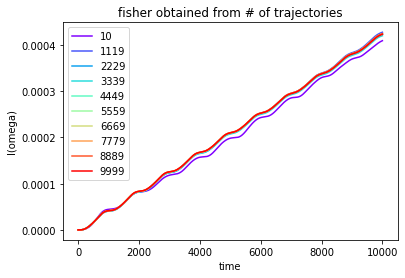

In [105]:
colors = plt.get_cmap("rainbow")
stacked = np.stack(list(m.values()))
plt.title("fisher obtained from # of trajectories")
for ind, cu in enumerate(stds):
    plt.plot(stacked[ind], color=colors(np.linspace(0,1,len(stacked)))[ind], label=str(int(trajs[ind])))
plt.legend()
plt.xlabel("time")
plt.ylabel("I(omega)")

In [106]:
ss = np.stack(list(uts.values()))

In [144]:
ind_traj = 0
points = [dt*np.sum(np.abs(ss[ind_traj, :]))**2 for ind_traj in range(1, len(ss))]

In [145]:
pp = [np.mean(ss[ind_traj, :]) for ind_traj in range(1, len(ss))]

Text(0, 0.5, 'distribution of I_i')

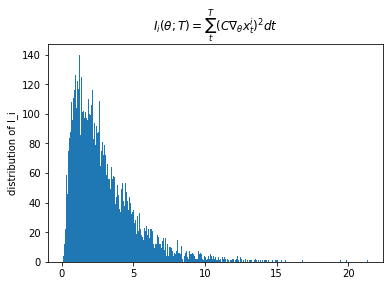

In [146]:
plt.title(r'$I_i(\theta; T) = \sum_t^{T} (C \nabla_\theta x^{i}_t)^2 dt$') # "np.sum(np.abs(ss[ind_traj, :])**2)*dt")
plt.hist(points, bins=int(len(points)/20))
plt.ylabel("distribution of I_i")
#plt.hist(pp, bins=len(points))

Text(0, 0.5, 'distribution of I_i')

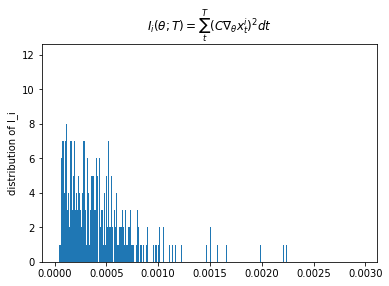

In [96]:
plt.title(r'$I_i(\theta; T) = \sum_t^{T} (C \nabla_\theta x^{i}_t)^2 dt$') # "np.sum(np.abs(ss[ind_traj, :])**2)*dt")
plt.hist(points, bins=len(points))
plt.ylabel("distribution of I_i")
#plt.hist(pp, bins=len(points))

In [78]:
trajs =  [int(t) for t in np.linspace(10,999,10)]

In [79]:
means_traj =[np.mean(points[:t]) for t in trajs]

In [80]:
stds_traj =[np.std(points[:t]) for t in trajs]

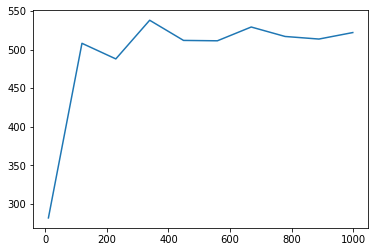

In [81]:
plt.plot(trajs, stds_traj)

load results omega..

In [ ]:
omegas = {}
uths = {}
for itraj in tqdm(range(1,1000)):
    try:
        omegas[itraj] = []
        for train_id in range(3,10):
            train_path = get_path_config(periods = periods, ppp= ppp, rppp=1, method=method, itraj=itraj, exp_path=exp_path) +"training/train_id_{}/".format(train_id)
            omegas[itraj].append(np.squeeze(np.load(train_path+"Coeffs_A.npy"))[-1])
    except Exception:
        pass

OLDISIMO

In [7]:
omegas = {}
uths = {}
for itraj in tqdm(range(1,501)):
    train_path = get_path_config(periods = periods, ppp= ppp, rppp=1, method=method, itraj=itraj, exp_path=exp_path) +"training/train_id_{}/".format(train_id)
    try:
        omegas[itraj] = np.squeeze(np.load(train_path+"Coeffs_A.npy"))[-1]
    except Exception:
        pass

100%|██████████| 500/500 [00:09<00:00, 55.47it/s]


In [8]:
omegas = np.array(list(omegas.values()))

In [11]:
(np.mean(omegas), np.std(omegas))

(10001.954, 119.502945)

In [74]:
np.sqrt(1/fisher[-1])

48.416528248552794

In [13]:
from lmfit.models import LorentzianModel
def fit_lorentzian(signals):
    Period = 2*np.pi/omega
    spectra_signal = np.abs(np.fft.fft(signals[:,0]))**2
    freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

    
    spectra_signal = spectra_signal[freqs_signal>=0]
    freqs_signal = freqs_signal[freqs_signal>=0]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

    
    mod = LorentzianModel()
    
    pars = mod.guess(spectra_signal, x=freqs_signal)
    out = mod.fit(spectra_signal, pars, x=freqs_signal)
    
    return out.values["center"]

In [14]:
fits = []
for itraj in tqdm(range(1,501)):
    
    states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, 
                                                     method=method, itraj=itraj, exp_path=exp_path , rppp = rppp_reference, fisher=False)

    fits.append(fit_lorentzian(signals))

100%|██████████| 500/500 [09:30<00:00,  1.14s/it]


In [15]:
np.save("fits_lorentzians.npy", np.array(fits))

In [16]:
fits = np.array(fits)

In [19]:
states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, 
                                                 method=method, itraj=2, exp_path=exp_path , rppp = rppp_reference, fisher=False)

In [50]:
Period = 2*np.pi/omega
spectra_signal = np.abs(np.fft.fft(signals[:,0]))**2
freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)


conds0 = freqs_signal>=0
conds0 = (fomega - 2*fomega <= freqs_signal) 
conds1 = (fomega + 2*fomega > freqs_signal) 
conds = np.logical_and(conds0,conds1,conds0)

spectra_signal = spectra_signal[conds]
freqs_signal = freqs_signal[conds]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

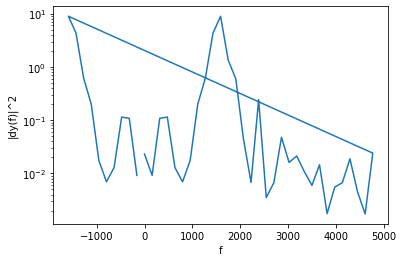

In [51]:
ax = plt.subplot(111)
ax.plot(freqs_signal,spectra_signal)
fomega = omega/(2*np.pi)
ax.set_ylabel("|dy(f)|^2")
ax.set_xlabel("f")
#ax.axvline(params[-2]/(2*np.pi),color="black")
#ax.set_xlim([fomega-fomega/10,fomega + 0.1*fomega])

ax.set_yscale("log")

In [85]:
nors = np.array([np.random.normal(loc=0, scale=2) for k in range(1000)])

In [86]:
np.mean(nors)

0.056373556811301004

In [88]:
np.std(nors)**2

4.23719914573008

In [19]:
total_loss = np.load(train_path+"Coeffs_A.npy")

In [13]:
omegas = np.array(list(omegas.values()))

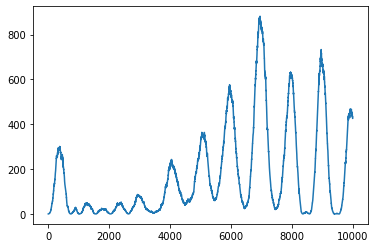

In [27]:
plt.plot(u_th[:,0]**2)

In [28]:
fisher_times

array([0.00000000e+00, 1.97404600e-03, 8.94335937e-03, ...,
       1.23998322e+02, 1.24064835e+02, 1.23960487e+02], dtype=float32)

In [39]:
fish = np.array(fissh)*dt

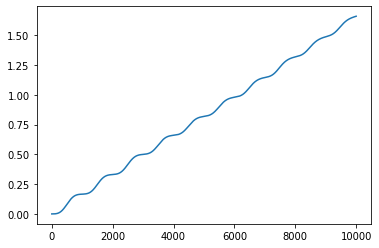

In [37]:
plt.plot(np.array(fissh)*dt)

In [40]:
ffish = np.fft.fft(fish)

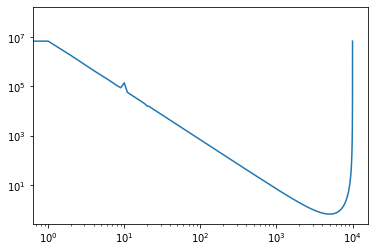

In [42]:
ax = plt.subplot(111)
freqs_signal = np.fft.fftfreq(n = len(ffish), d= dt)
ax.plot(np.abs(ffish)**2)
ax.set_xscale("log")
ax.set_yscale("log")

In [38]:
1/(np.array(fissh)*dt)[-1]

0.6030686695032133

In [14]:
np.std(omegas)

106.71982

In [15]:
np.mean(omegas)

10008.641

In [8]:
u_th2 = np.stack(list(uths.values()))

In [9]:
u_th2.shape

(165, 10001, 2)

In [10]:
u_th2 = u_th2[:,:,0]

In [11]:
fisher_times = np.mean(u_th2,axis=0)

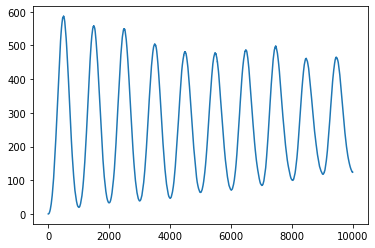

In [13]:
plt.plot(fisher_times)

100%|██████████| 500/500 [00:02<00:00, 178.82it/s]


In [19]:
fishers = np.mean(np.square(np.stack(list(uts.values()))[:,:,0]),axis=0)

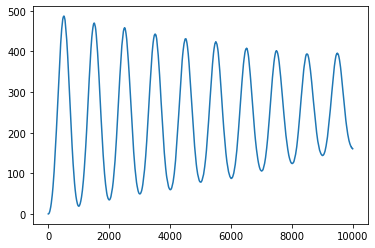

In [20]:
plt.plot(fishers)

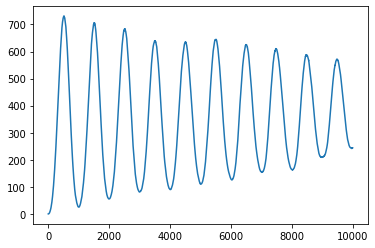

In [24]:
plt.plot(np.std(np.square(np.stack(list(uts.values()))[:,:,0]),axis=0))

In [41]:
omms = np.squeeze(np.array(list(omegas.values())))

In [31]:
means_ev = np.array([np.mean(omegas[i]) for i in omegas.keys()])
means_std = np.array([np.std(omegas[i]) for i in omegas.keys()])

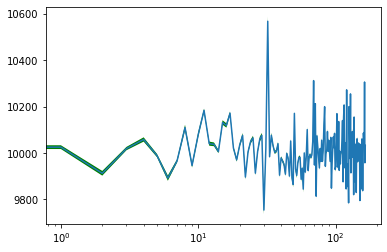

In [36]:
ax = plt.subplot(111)
times = range(len(means_ev))
ax.plot(times, means_ev)
ax.fill_between(times, means_ev - means_std/2, means_ev + means_std/2,facecolor='green')
ax.set_xscale("log")

array([9897.656 , 9754.582 , 9726.26  , 9768.734 , 9841.891 , 9918.215 ,
       9973.783 , 9994.334 , 9980.986 , 9943.738 , 9895.225 , 9848.751 ,
       9816.289 , 9804.912 , 9814.9   , 9841.187 , 9875.705 , 9909.207 ,
       9933.213 , 9942.329 , 9935.65  , 9916.406 , 9890.602 , 9865.434 ,
       9847.516 , 9841.069 , 9846.838 , 9862.21  , 9882.232 , 9901.03  ,
       9913.427 , 9916.417 , 9909.928 , 9896.605 , 9880.862 , 9867.522 ,
       9860.379 , 9861.085 , 9868.78  , 9880.539 , 9892.39  , 9900.603 ,
       9902.863 , 9898.936 , 9890.598 , 9880.932 , 9873.235 , 9869.916 ,
       9871.729 , 9877.632 , 9885.264 , 9891.84  , 9895.149 , 9894.297 ,
       9889.937 , 9883.926 , 9878.579 , 9875.794 , 9876.38  , 9879.833 ,
       9884.617 , 9888.8125, 9890.872 , 9890.189 , 9887.263 , 9883.425 ,
       9880.262 , 9878.968 , 9879.896 , 9882.481 , 9885.535 , 9887.771 ,
       9888.344 , 9887.161 , 9884.869 , 9882.525 , 9881.122 , 9881.173 ,
       9882.528 , 9884.49  , 9886.156 , 9886.825 , 

In [22]:
fisher_tf_path = get_path_config(periods = periods, ppp= ppp, rppp=1, method=method, itraj=4, exp_path=exp_path) +"fisher_tf/"
gg = np.load(fisher_tf_path+"fisher_tf.npy")


FileNotFoundError: [Errno 2] No such file or directory: '/data/uab-giq/scratch/matias/quantera/trajectories/[1, 100, 1000000, 10000.0, 1]/4itraj/rossler_real_traj_method/10periods/1000ppp/1rppp/fisher_tf/fisher_tf.npy'

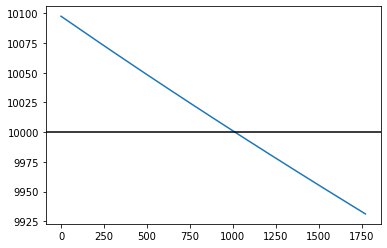

In [40]:
ax = plt.subplot(111)
ax.plot(total_loss[:,0,0])
ax.axhline(omega,color="black")

In [20]:
np.random.seed(0)
np.random.uniform(omega - omega/10, omega + omega/10 )

10097.62700785465

In [41]:
omega

10000.0

In [22]:
omega

10000.0

In [31]:
np.random.random()

0.6027633760716439

NameError: name 'omega' is not defined

In [4]:
Period = 2*np.pi/omega
dt = Period/ppp
Cxdt = np.einsum('ij,bj->bi',C,states[:-1])*dt
likelihoods = np.square((signals - Cxdt)/(2*dt))

NameError: name 'C' is not defined

First check: $\sum_t \frac{1}{2 dt} (dy_t -Cx dt)^2  \sim N/2$

In [18]:
print(ppp*periods/2, np.sum((0.5/dt)*(signals-Cxdt)**2))

5000.0 5056.618984100279


Second check: $\sum_t (dy_t - Cxdt)^2 \sim \sum_t dW^2 = T$

In [19]:
print(Period*periods, np.sum((signals-Cxdt)**2))

0.006283185307179586 0.0063543348209808455


Third check: fluctuations to be minimized

In [53]:
rppp_reference=1
path_landscape= get_path_config(periods = periods, ppp= ppp, rppp=rppp_reference, method=method, itraj=itraj, exp_path = exp_path)+"landscape/"
omegas = np.load(path_landscape+"omegas.npy")
cost = np.load(path_landscape+"losses.npy")

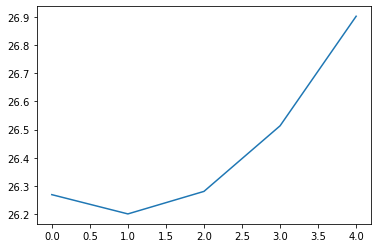

In [55]:
plt.plot(cost[:,-1])

array([37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47813034,
       37.47813034, 37.47813034, 37.47813034, 37.47813034, 37.47

In [47]:
simu_states = {}
for ind, om in enumerate(omegas):
    simu_states[om] = np.load(path_landscape+"simu_states/{}.npy".format(om))

In [48]:
states_simu  = simu_states[omega]

In [49]:
new_cost = {}
for ind, om in enumerate(omegas):
    Csimu_dt = np.einsum("ij,bj->bi",C,simu_states[om][:-1])*dt
    initial_cost = np.sum(np.square(signals-Csimu_dt))
    new_cost[om] = (initial_cost - Period*periods)/(2*C[0,0]*(dt**(3/2)))

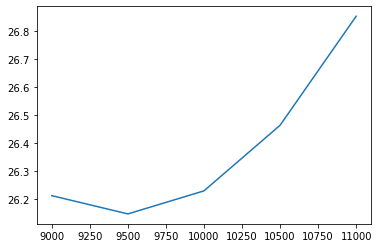

In [50]:
plt.plot(list(new_cost.keys()), list(new_cost.values()))

0.02148462262923569

In [56]:
params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params


params = give_def_params(mode="aspel") #params = [eta, gamma, kappa, omega, n]

params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params




periods = 1000
ppp = 5000
method = "rossler"
rppp = 1
itraj = 1
states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, itraj=itraj, exp_path=exp_path , rppp = 1)


In [59]:
states, covs, signals, params, times = load_data(ppp=1000, periods=100, method=method, itraj=itraj, exp_path=exp_path , rppp = rppp_reference)


In [62]:
exp_path

'[1, 6283.185307179586, 3472471.485641353, 10000.0, 20]/'

In [6]:
loss_0 = np.sum(likelihoods)/times[-1]

In [7]:
np.sum(np.square((signals[:,0] - Cxdt[:,0]))/dt)/(ppp*periods)

1.0000569614623043

In [25]:
negs = -np.inf
Period = 2*np.pi/params[-2]

fourier_signal = np.fft.fft(signals[:,0])
freqs_signal = np.fft.fftfreq(n = len(fourier_signal), d= Period/ppp)

filter_cond = freqs_signal>negs
freqs_signal = freqs_signal[filter_cond]
spectra_signal = np.abs(fourier_signal[filter_cond])**2

fourier_state = np.fft.fft(states[:,0])
freqs_state = np.fft.fftfreq(n = len(fourier_state), d= Period/ppp)

filter_cond = freqs_state>negs
freqs_state = freqs_state[filter_cond]
spectra_state = np.abs(fourier_state[filter_cond])**2


In [ ]:
ax = plt.subplot(211)

ax.plot(freqs_signal,spectra_signal)
ax.set_ylabel("|dy(f)|^2")
ax.set_xlabel("f")
#ax.axvline(params[-2]/(2*np.pi),color="black")
#ax.set_xscale("log")
ax.set_yscale("log")


NameError: name 'C' is not defined

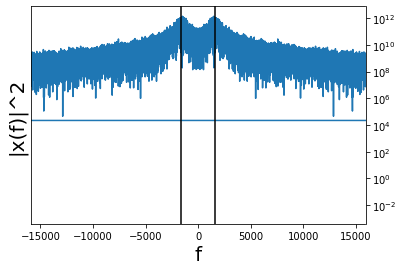

In [42]:

fomega = omega/(2*np.pi)
ax.set_xlim([-10*fomega,10*fomega])

ax = plt.subplot(111)
A = 0.5*1e4
ax.plot(freqs_state,spectra_state)
ax.set_xlim([-10*fomega,10*fomega])
#ax.axvline(params[-2]/(2*np.pi),color="black")
ax.set_ylabel("|x(f)|^2",size=20)
ax.axvline(fomega,color="black")
ax.axvline(-fomega, color="black")

#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
#ax.set_xscale("log")
ax.set_yscale("log")

In [30]:
coss = np.cos(omega*times)
ffcoss = np.fft.fft(coss)

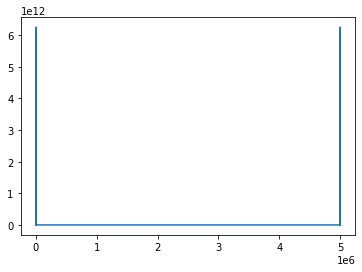

In [32]:
plt.plot(np.abs(ffcoss)**2)

In [46]:
### LOAD "STROBOSCOPIC REAL" trajectories (integrated with longer dt's, same noise)
rossler_dt = {}
windows = np.concatenate([(10**k)*np.arange(2,5) for k in range(1)])

rppps = [1] + list(windows)
for rppp in rppps:
    rossler_dt[rppp], covs, signals, params, times = load_data(periods=periods, ppp=ppp, method="rossler", rppp = rppp, exp_path=exp_path)

errs_rossler_strobo = {}
for rppp in rossler_dt.keys():
    errs_rossler_strobo[rppp] = np.sqrt(np.mean(np.square(states[::rppp] - rossler_dt[rppp])))


FileNotFoundError: [Errno 2] No such file or directory: '../quantera/trajectories/[0.74, 6283.185307179586, 3472471.485641353, 42000.0, 20]/1itraj/rossler_real_traj_method/100periods/1000ppp/2rppp/times.npy'

array([1])

In [2]:

[eta, gamma, kappa, omega, n] = params
[C, A, D , Lambda] = build_matrix_from_params(params)

params = give_def_params()

params[-2] = params[-2]/10
omega1 = params[-2]
params, exp_path = check_params(params)
states1, covs, signals1, params, times = load_data(ppp=ppp, periods=periods, method=method, itraj=itraj, exp_path=exp_path , rppp = 1)
params[-2] = params[-2]/100
omega2 = params[-2]
states2, covs, signals2, params, times = load_data(ppp=ppp, periods=periods, method=method, itraj=itraj, exp_path=exp_path , rppp = 1)


In [4]:
Period = 2*np.pi/params[-2]

In [10]:
dtt = 1/np.sqrt(C)[0,0]

In [16]:
(2*np.pi/dtt)*1e-3

0.04018911059780682

In [12]:
negs = 0
Period = 2*np.pi/params[-2]

fourier_state = np.fft.fft(states[:,0])
freqs_state = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega)/ppp)



fourier_state1 = np.fft.fft(states1[:,0])
freqs_state1 = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega1)/ppp)

filter_cond = freqs_state>=negs
freqs_state = freqs_state[freqs_state>=negs]
freqs_state1 = freqs_state1[freqs_state1>=negs]

spectra_state = np.abs(fourier_state[filter_cond])**2
spectra_state1 = np.abs(fourier_state1[filter_cond])**2

ax = plt.subplot(111)
ax.plot(freqs_state,spectra_state)
ax.plot(freqs_state1,spectra_state1)

ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")


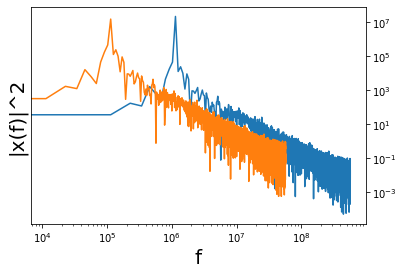

8.771053e-05

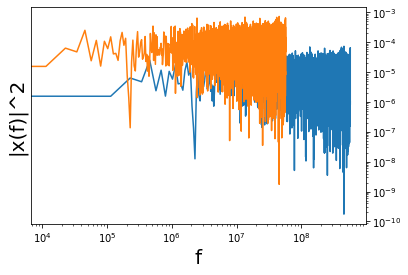

In [18]:
negs = 0
Period = 2*np.pi/params[-2]

fourier_state = np.fft.fft(signals[:,0])
freqs_state = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega)/ppp)


fourier_state1 = np.fft.fft(signals1[:,0])
freqs_state1 = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega1)/ppp)

filter_cond = freqs_state>=negs
freqs_state = freqs_state[freqs_state>=negs]
freqs_state1 = freqs_state1[freqs_state1>=negs]

spectra_state = np.abs(fourier_state[filter_cond])**2
spectra_state1 = np.abs(fourier_state1[filter_cond])**2

ax = plt.subplot(111)
ax.plot(freqs_state,spectra_state)
ax.plot(freqs_state1,spectra_state1)

ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")


In [20]:
times[-1]

8.771053e-05

In [22]:
tf = 400*1e-6

In [23]:
params = give_def_params()
omega = params[-2]

In [24]:
period_length = 2*np.pi/omega
periods_needed = tf/period_length

In [25]:
periods_needed

455.99999999999994

what happens then for 1000 periods ? 

In [26]:
params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params


periods = 1000
ppp = 1000
method = "rossler"
rppp = 1
itraj = 1
states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, itraj=itraj, exp_path=exp_path , rppp = 1)

[eta, gamma, kappa, omega, n] = params
[C, A, D , Lambda] = build_matrix_from_params(params)


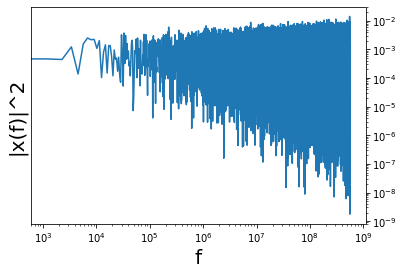

In [27]:
negs = 0
Period = 2*np.pi/params[-2]

fourier_state = np.fft.fft(signals[:,0])
freqs_state = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega)/ppp)


filter_cond = freqs_state>=negs
freqs_state = freqs_state[freqs_state>=negs]

spectra_state = np.abs(fourier_state[filter_cond])**2

ax = plt.subplot(111)
ax.plot(freqs_state,spectra_state)

ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")


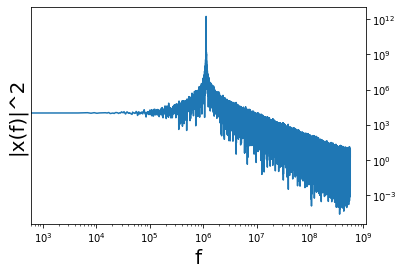

In [28]:
negs = 0
Period = 2*np.pi/params[-2]

fourier_state = np.fft.fft(states[:,0])
freqs_state = np.fft.fftfreq(n = len(fourier_state), d= (2*np.pi/omega)/ppp)


filter_cond = freqs_state>=negs
freqs_state = freqs_state[freqs_state>=negs]

spectra_state = np.abs(fourier_state[filter_cond])**2

ax = plt.subplot(111)
ax.plot(freqs_state,spectra_state)

ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")


todo indica que la medida es una mierda :)

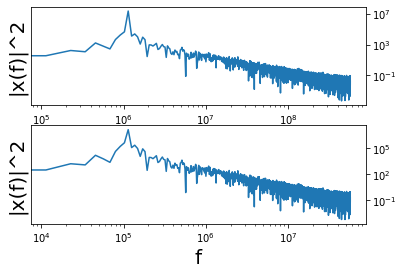

In [13]:
ax = plt.subplot(211)
ax.plot(freqs_state,spectra_state)
ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")

ax = plt.subplot(211)
ax.plot(freqs_state,spectra_state)
ax.set_ylabel("|x(f)|^2",size=20)
#ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel("f",size=20)
ax.set_xscale("log")
ax.set_yscale("log")

In [ ]:


plt.figure(figsize=(10,5))
ax = plt.subplot(121)
ax.plot(freqs_signal,spectra_signal)
ax.set_ylabel("|dy(f)|^2",size=20)
ax.set_xlabel("f",size=20)
ax.axvline(params[-2]/(2*np.pi),color="black")
ax.set_xscale("log")
ax.set_yscale("log")



In [3]:
params = give_def_params()
Period = 2*np.pi/omega ### 
dt = (Period/ppp)*rppp ### this is because you might increase the dt as well! (1 for now)

np.square(signals0 - np.einsum('ij,bj->bi',C,states1[:-1])*dt)

NameError: name 'C' is not defined

In [175]:
params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params
path_landscape= get_path_config(periods = periods, ppp= ppp, rppp=rppp, method=method, itraj=itraj, exp_path = exp_path)+"landscape/"
loss = np.load(path_landscape+"losses.npy")

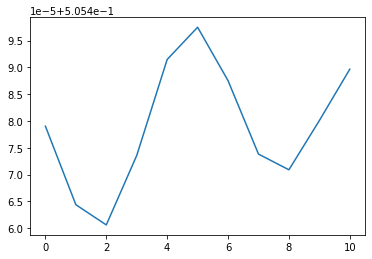

In [180]:
plt.plot(loss[:,-1])

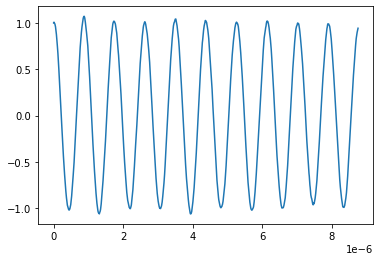

In [151]:
a=0
b=10**3
plt.plot(times[a:b],states[:-1][:,0][a:b])

In [ ]:
params = give_def_params()

Period = 2*np.pi/params[-2]
dt = (Period/ppp)*rppp ### this is because you might increase the dt as well! (1 for now)

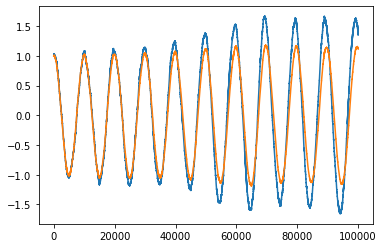

In [97]:
plt.plot(states1[:,0])
plt.plot(states[:,0])

ValueError: operands could not be broadcast together with shapes (1000,2) (100000,2) 

In [157]:
np.sum(np.square(signals0 - np.einsum('ij,bj->bi',C,states)[:-1]*dt))/(2*times[-1])

1.0138098231614643

In [126]:
dt

8.771929824561403e-11

(array([2.8000e+01, 3.9700e+02, 3.2910e+03, 1.3812e+04, 2.9113e+04,
        3.1061e+04, 1.7026e+04, 4.5820e+03, 6.3600e+02, 5.4000e+01]),
 array([-4.0527582e-05, -3.2571039e-05, -2.4614495e-05, -1.6657954e-05,
        -8.7014105e-06, -7.4486707e-07,  7.2116759e-06,  1.5168219e-05,
         2.3124761e-05,  3.1081305e-05,  3.9037848e-05], dtype=float32),
 <BarContainer object of 10 artists>)

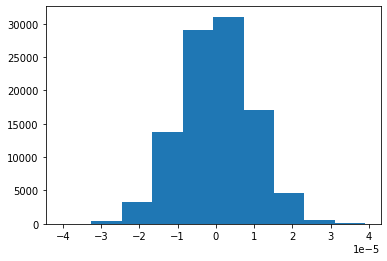

In [121]:
plt.hist(signals0[:,0])

(array([15996., 11135.,  8351.,  7281.,  6907.,  6939.,  7343.,  8414.,
        11150., 16484.]),
 array([-4.25420824e-09, -3.40592188e-09, -2.55763553e-09, -1.70934917e-09,
        -8.61062810e-10, -1.27764523e-11,  8.35509905e-10,  1.68379626e-09,
         2.53208262e-09,  3.38036898e-09,  4.22865534e-09]),
 <BarContainer object of 10 artists>)

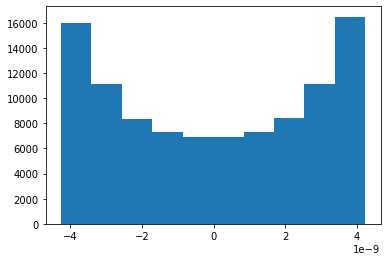

In [122]:
plt.hist(np.einsum('ij,bj->bi',C,states)[:-1][:,0]*dt)

In [182]:
params = give_def_params()
params, exp_path = check_params(params)

periods = 10
ppp = 1000
rossler_dt = {}
windows = np.concatenate([(10**k)*np.arange(2,11) for k in range(2)])
rppps = [1] + list(windows)
for rppp in rppps:
    rossler_dt[rppp], covs, signals, params, times = load_data(periods=periods, ppp=ppp, method="rossler", rppp = rppp, exp_path=exp_path)
    #states_euler[rppp], covs_euler, signals_euler, params_euler, times_euler = load_data(path=get_def_path()+"rppp{}/".format(rppp), 
     #                                                                              periods=periods, ppp=ppp, method="euler")

Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 1000
periods: 10
metho

In [194]:
lls = [len(states[::k]) for k in rossler_dt.keys()]
ll = [len(rossler_dt[k]) for k in rossler_dt.keys()]


/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


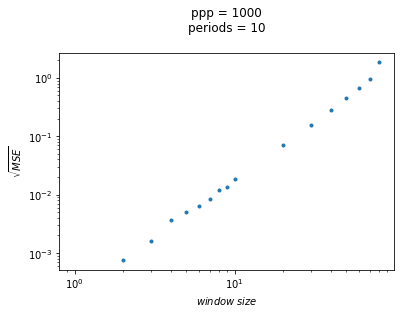

In [189]:
errs = {}
for rppp in rossler_dt.keys():
    errs[rppp] = np.sqrt(np.mean(np.square(states[::rppp] - rossler_dt[rppp])))
plt.title("ppp = {}\nperiods = {}\n".format(ppp,periods))
ax = plt.subplot(111)
ax.plot(errs.keys(), errs.values(), '.')
ax.set_ylabel(r'$\sqrt{MSE}$')
ax.set_xlabel(r'$window \; size$')
ax.set_xscale("log")
ax.set_yscale("log")

In [195]:
params = give_def_params()
params, exp_path = check_params(params)

periods = 10
ppp = 10000
rossler_dt = {}
windows = np.concatenate([(10**k)*np.arange(2,11) for k in range(2)])
rppps = [1] + list(windows)
for rppp in rppps:
    rossler_dt[rppp], covs, signals, params, times = load_data(periods=periods, ppp=ppp, method="rossler", rppp = rppp, exp_path=exp_path)
    #states_euler[rppp], covs_euler, signals_euler, params_euler, times_euler = load_data(path=get_def_path()+"rppp{}/".format(rppp), 
     #                                                                              periods=periods, ppp=ppp, method="euler")

Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1
Traj loaded 
ppp: 10000


/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


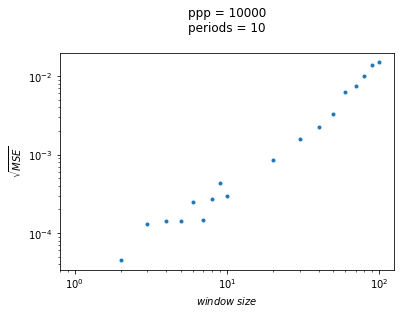

In [197]:
errs = {}
for rppp in rossler_dt.keys():
    errs[rppp] = np.sqrt(np.mean(np.square(rossler_dt[1][::rppp] - rossler_dt[rppp])))
plt.title("ppp = {}\nperiods = {}\n".format(ppp,periods))
ax = plt.subplot(111)
ax.plot(errs.keys(), errs.values(), '.')
ax.set_ylabel(r'$\sqrt{MSE}$')
ax.set_xlabel(r'$window \; size$')
ax.set_xscale("log")
ax.set_yscale("log")

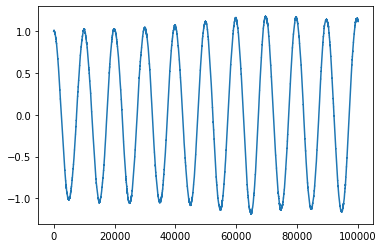

In [202]:
plt.plot(rossler_dt[1][:,0])

In [ ]:
plt.plot(rossler_dt[1][:,0])

In [203]:
    rossler_dt[rppp], covs, signals, params, times = load_data(periods=periods, ppp=ppp, method="rossler", rppp = 1, exp_path=exp_path)


Traj loaded 
ppp: 10000
periods: 10
method: rossler
itraj: 1


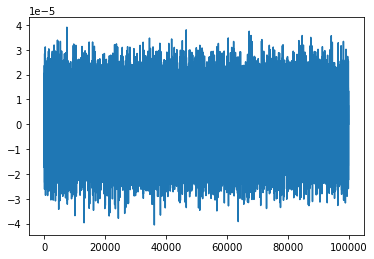

In [204]:
plt.plot(signals[:,0])

In [206]:
aa = np.fft.fft(signals[:,0])

/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


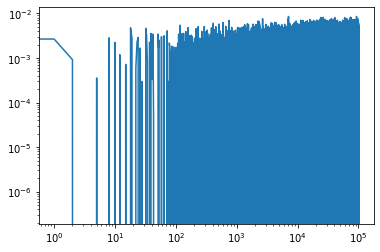

In [207]:
aa = np.fft.fft(states[:,0])
ax = plt.subplot(111)
ax.plot(aa)
ax.set_xscale("log")
ax.set_yscale("log")

8.771929518626239e-11

In [340]:
freqs_signal

array([0.00000000e+00, 1.14000004e+05, 2.28000008e+05, ...,
       5.69965820e+09, 5.69977220e+09, 5.69988620e+09])

/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


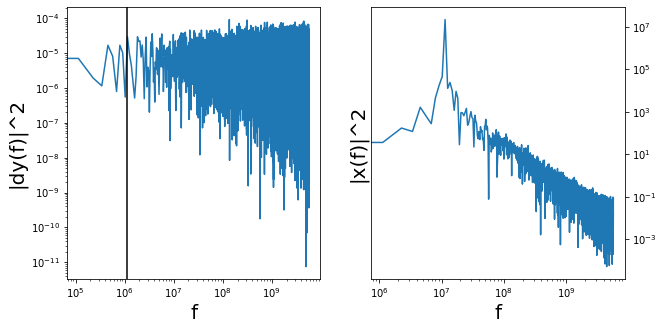

In [330]:
fourier_states = np.fft.fft(states[:,0])
freqs_states = np.fft.fftfreq(n = len(fourier_states), d= Period/ppp)


/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(744582.6958872348, 500000000.0)

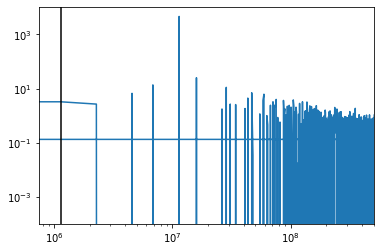

In [346]:

ax = plt.subplot(111)
ax.plot(freqs_states,fourier_states)
ax.axvline(params[-2]/(2*np.pi),color="black")
ax.set_xscale("log")
ax.set_yscale("log")
ep=.5*1e9
ax.set_xlim([-ep, ep])

In [241]:
fff[0]

0.0

5699943199.364683

/home/cooper-cooper/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


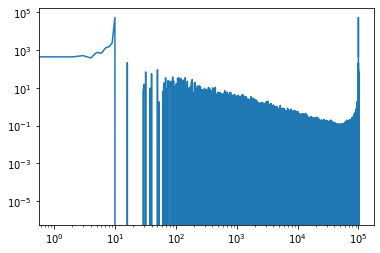

In [208]:
aa = np.fft.fft(rossler_dt[1][:,0])
ax = plt.subplot(111)
ax.plot(aa)
ax.set_xscale("log")
ax.set_yscale("log")

In [209]:
np.fft.fr

8.771929824561403e-10

In [35]:
xi = lambda cov,Lambda: np.dot(cov, C.T) + Lambda.T
def evolve_simu_state(x,cov, dy, simu_A, internal_step):
    XiCov = xi(cov, Lambda)
    dx = np.dot(simu_A-np.dot(XiCov,C),x)*internal_step  + np.dot(XiCov,dy)
    dcov = (np.dot(simu_A,cov) + np.dot(cov, ct(simu_A)) + D - np.dot(XiCov, XiCov.T))*internal_step
    return [x + dx, cov + dcov]

In [36]:
simu_states, simu_covs = {}, {}
omegas = np.array([omega]) + np.linspace(-omega/10, omega/10, 11) ## even number required so we have omega !!

In [37]:
Period = 2*np.pi/omega
dt = (Period/ppp)*rppp ### this is because you might increase the dt as well! (1 for now)

In [41]:
#cuts_final_time = np.unique(np.concatenate([(10**k)*np.arange(1,11,1) for k in range(1,5)]))
#cuts_final_time = cuts_final_time[:(np.argmin(np.abs(cuts_final_time - len(times)))+1)] -1 #the -1 is for pyhton oindexing
cuts_final_time = [len(times)]
loss = np.zeros((len(omegas), len(cuts_final_time)))

In [42]:
for ind_simu_omega, simu_omega in tqdm(enumerate(omegas)):
    simu_A = np.array([[-.5*gamma, simu_omega], [-simu_omega, -0.5*gamma]])
    simu_states[simu_omega] = [states[0]]
    simu_covs[simu_omega] = [covs[0]]

    for ind,dy in enumerate(tqdm(signals)):
        simu = evolve_simu_state(simu_states[simu_omega][-1], simu_covs[simu_omega][-1], dy, simu_A,  dt)
        simu_states[simu_omega].append(simu[0])
        simu_covs[simu_omega].append(simu[1])

    for indcut, cut in enumerate(cuts_final_time):
        loss[ind_simu_omega, indcut] = np.sum(np.square(signals[:cut] - np.einsum('ij,bj->bi',C,simu_states[simu_omega][:-1][:cut])*dt))/(2*times[cut])


0it [00:00, ?it/s]
100%|██████████| 100001/100001 [00:03<00:00, 29501.89it/s][A
0it [00:03, ?it/s]


IndexError: index 100001 is out of bounds for axis 0 with size 100001

In [38]:
loss[ind_simu_omega, indcut] = np.sum(np.square(signals[:cut] - np.einsum('ij,bj->bi',C,simu_states[simu_omega][:-1][:cut])*dt))/(2*times[cut])


[554592.010219149,
 11948322.656306505,
 92511523.0173423,
 33246917.547910087,
 71628.31250184722,
 199310.03441624518,
 7162831.250184728,
 1543185.21242424,
 4294004.52217807,
 716283125.0184736,
 257418808.18440673]

In [29]:
covs[-1]

array([[ 0.16634014,  0.7283633 ],
       [ 0.7283633 , 14.423183  ]], dtype=float32)

In [4]:
[eta, gamma, kappa, omega, n] = give_def_params()
C,A, D , Lambda = build_matrix_from_params([eta, gamma, kappa, omega, n])

In [5]:
2*np.pi/omega

8.771929824561404e-07

In [6]:
vuc = n + 0.5 + (kappa/2)/gamma

In [7]:
vuc

19.236842105263158

In [8]:
mu = gamma/(4*eta*kappa)

In [9]:
vss = -mu + np.sqrt(mu*(mu + 2*vuc))

In [10]:
vss

1.136204809312643

In [12]:
covs[-1]

array([[ 0.16634014,  0.7283633 ],
       [ 0.7283633 , 14.423183  ]], dtype=float32)

Ive a problem since in the paper they solve it for the ... ?

In [26]:
#rot_int = np.array([[np.cos(omega), np.sin(omega)],[-np.sin(omega), np.cos(omega)]])


In [25]:
np.dot(np.dot((rot_int.T),covs[-1]), rot_int)

array([[ 0.16634014,  0.72836329],
       [ 0.72836329, 14.42318344]])

array([[0.]])

Traj loaded 
ppp: 10000
periods: 100
method: rossler
itraj: 1


/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square


Text(0.5, 0, 'multiplying factor in the integration step')

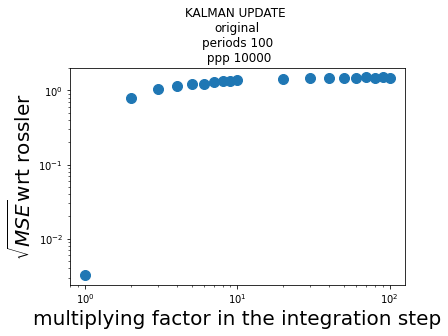

In [33]:
import os
import numpy as np

windows = np.concatenate([(10**k)*np.arange(2,11) for k in range(3)])
method = "rossler"
ppp = 10000
periods = 100
itraj = 1
rppp=1

states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, itraj=itraj, path=get_def_path() + "rppp{}/".format(1)) #"true states"

omega = 2*np.pi
omegas = list(set([omega] + list(np.linspace(0, 2*omega, 10))))

states_eu_opt = {}
for eu_rppp in [1] + list(windows):
    path_kalman_dt =get_def_path()+"{}rppp/{}periods/{}ppp/{}/kalman_dt/euler_rppp{}/".format(rppp,periods,ppp,itraj,eu_rppp)
    states_eu_opt[eu_rppp] = np.load(path_kalman_dt+"states/states{}.npy".format(np.argmin(np.abs(np.array(omegas)-omega))))
    
    
errs = {}
for rdt in states_eu_opt.keys():
    errs[rdt] = np.sqrt(np.mean(np.square(states[::rdt] - states_eu_opt[rdt])))
    
    
ax = plt.subplot(111)
ax.set_title("KALMAN UPDATE \noriginal\nperiods {}\n ppp {}".format(periods, ppp))
ax.scatter(errs.keys(), errs.values(),s=100)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'$\sqrt{MSE}$'+"wrt rossler",size=20)
ax.set_xlabel("multiplying factor in the integration step", size=20)

/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


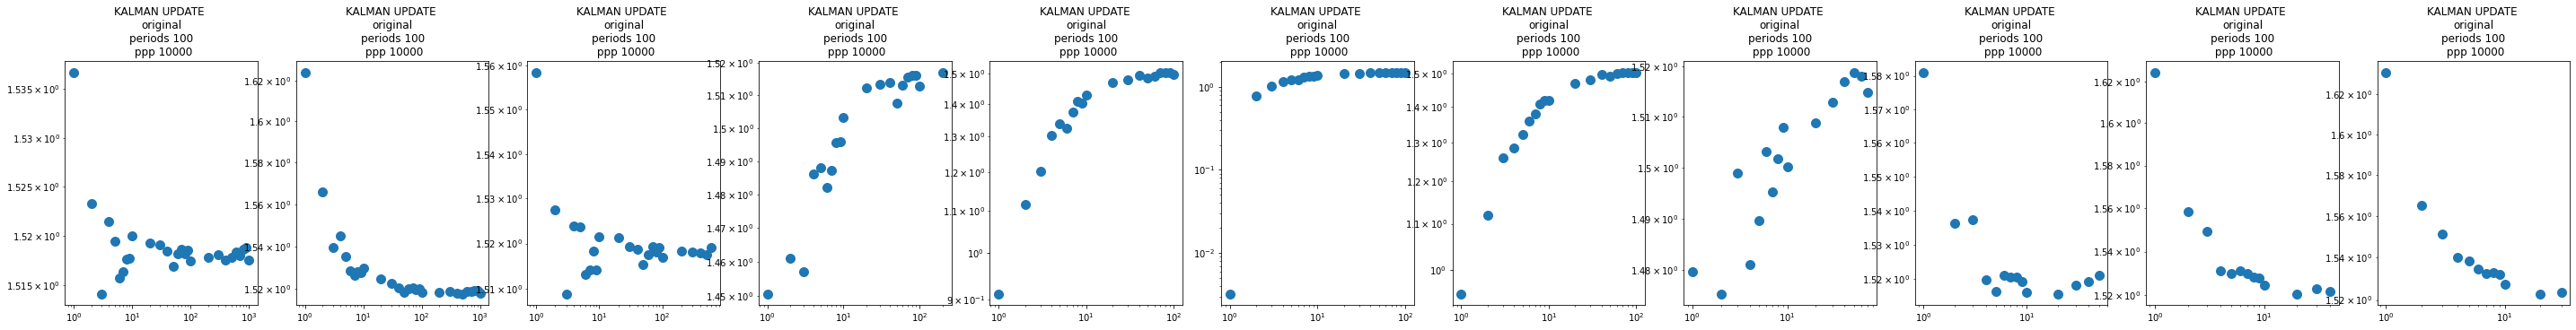

In [43]:
plt.figure(figsize=(50,5))
for ind_omega, omega in enumerate(omegas):

    states_eu_opt = {}
    for eu_rppp in [1] + list(windows):
        path_kalman_dt =get_def_path()+"{}rppp/{}periods/{}ppp/{}/kalman_dt/euler_rppp{}/".format(rppp,periods,ppp,itraj,eu_rppp)
        states_eu_opt[eu_rppp] = np.load(path_kalman_dt+"states/states{}.npy".format(ind_omega))#np.argmin(np.abs(np.array(omegas)-omega))))


    errs = {}
    for rdt in states_eu_opt.keys():
        errs[rdt] = np.sqrt(np.mean(np.square(states[::rdt] - states_eu_opt[rdt])))


    ax = plt.subplot2grid((1, len(omegas)),(0, ind_omega))
    ax.set_title("KALMAN UPDATE \noriginal\nperiods {}\n ppp {}".format(periods, ppp))
    ax.scatter(errs.keys(), errs.values(),s=100)
    ax.set_yscale("log")
    ax.set_xscale("log")
    #ax.set_ylabel(r'$\sqrt{MSE}$'+"wrt rossler",size=20)
    #ax.set_xlabel("multiplying factor in the integration step", size=20)

11

In [23]:
errs

{1: 0.003239809364242569,
 2: 0.7825023525470783,
 3: 1.0280056086537979,
 4: 1.1397660211915148,
 5: 1.2227025919765853,
 6: 1.2236596558157415,
 7: 1.2931298947551961,
 8: 1.3366663453540057,
 9: 1.3448086857782637,
 10: 1.3695192373455845,
 20: 1.44101164182424,
 30: 1.4563834014342545,
 40: 1.4783441928077006,
 50: 1.4637609342866458,
 60: 1.4756558064575838,
 70: 1.4904947790016616,
 80: 1.4878349175948258,
 90: 1.4916671870449119,
 100: 1.481518017880713,
 200: nan,
 300: nan,
 400: nan,
 500: nan,
 600: nan,
 700: nan,
 800: nan,
 900: nan,
 1000: nan}